# We need to find correlation of amount of bike leasing by other features

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('bikes_rent.csv')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


* _season_: 1 - sptring, 2 - summer, 3 - fall, 4 - winter
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: from 1 to 12
* _holiday_: 0 - no holidays, 1 - a holiday
* _weekday_: from 0 to 6
* _workingday_: 0 - weekend, 1 - working day
* _weathersit_: weather quality: 1 (sunny day) to 4 (rain, wind)
* _temp_: temperature (C)
* _atemp_: temperature (C) by feeling
* _hum_: level of hum
* _windspeed(mph)_: wind speed (mph)
* _windspeed(ms)_: wind speed (ms)
* _cnt_: amount of leasing bikes (needed feature to find a correlation of)

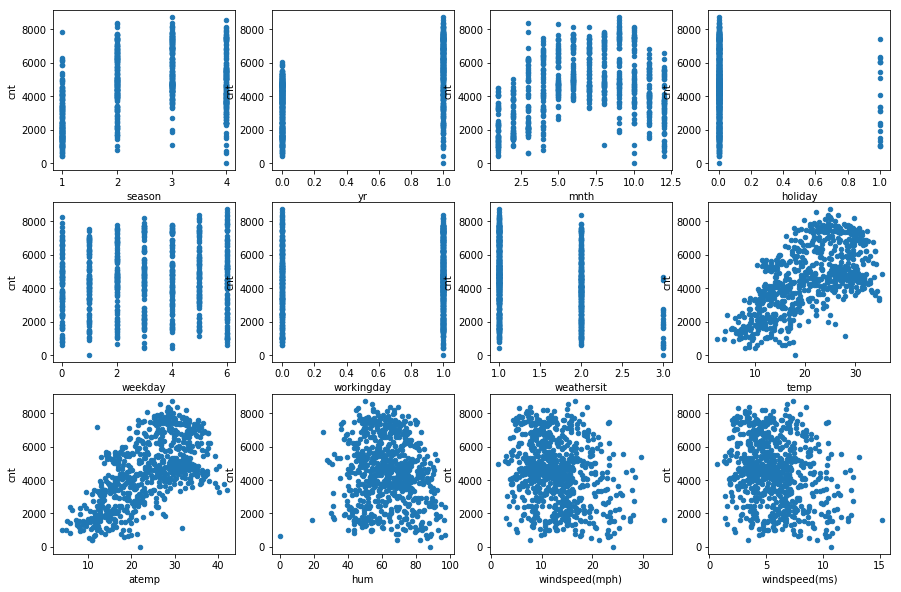

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[int(idx / 4), int(idx % 4)])

In [6]:
df[df.columns[:-1]].corrwith(df['cnt'])

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

In [8]:
features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']
for f1 in features:
    for f2 in features:
        print(np.round(df[f1].corr(df[f2]), 3), end=' ')
    print()

1.0 0.992 0.127 -0.158 -0.158 0.627 
0.992 1.0 0.14 -0.184 -0.184 0.631 
0.127 0.14 1.0 -0.248 -0.248 -0.101 
-0.158 -0.184 -0.248 1.0 1.0 -0.235 
-0.158 -0.184 -0.248 1.0 1.0 -0.235 
0.627 0.631 -0.101 -0.235 -0.235 1.0 


In [9]:
for f in df.columns:
    print(f + ": ", df[f].mean())

season:  2.496580027359781
yr:  0.5006839945280438
mnth:  6.519835841313269
holiday:  0.028727770177838577
weekday:  2.997264021887825
workingday:  0.6839945280437757
weathersit:  1.3953488372093024
temp:  20.31077632886456
atemp:  23.717699432284533
hum:  62.78940629274965
windspeed(mph):  12.762576179069764
windspeed(ms):  5.705219570438219
cnt:  4504.3488372093025


In [10]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [11]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]
print(X.shape, y.shape)

(731, 12) (731,)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
print('features    weight')
for f, w in zip(df.columns, linear_regressor.coef_):
    print(f + ':  ', w)
# we can see some linear dependenc (windspeed(mph) и windspeed(ms))

features    weight
season:   570.8665480187844
yr:   1021.9697362586192
mnth:   -141.30187607831897
holiday:   -86.76094466688603
weekday:   137.22482533122832
workingday:   56.39206348754788
weathersit:   -330.2292051241499
temp:   367.4825848597929
atemp:   585.5466392591891
hum:   -145.6093267782675
windspeed(mph):   12458865748347.059
windspeed(ms):   -12458865748545.52


In [14]:
from sklearn.linear_model import Lasso, Ridge

In [15]:
Lasso_regressor = Lasso()
Lasso_regressor.fit(X, y)
print('features    weight')
for f, w in zip(df.columns, Lasso_regressor.coef_):
    print(f + ':  ', w)

features    weight
season:   560.241616030887
yr:   1019.4634940657196
mnth:   -128.7306270367875
holiday:   -86.15278133371096
weekday:   137.34789390496329
workingday:   55.21237064135668
weathersit:   -332.3698569623488
temp:   376.3632362096987
atemp:   576.5307935045507
hum:   -144.12915500348595
windspeed(mph):   -197.13968940248608
windspeed(ms):   -2.8049652690829766e-08


In [16]:
Ridge_regressor = Ridge()
Ridge_regressor.fit(X, y)
print('features    weight')
for f, w in zip(df.columns, Ridge_regressor.coef_):
    print(f + ':  ', w)
# Compare Ridge and Lasso regressors

features    weight
season:   563.0645722520176
yr:   1018.9483787875286
mnth:   -131.87332028247695
holiday:   -86.74609799709272
weekday:   138.005111178719
workingday:   55.90311037506445
weathersit:   -332.34978849907355
temp:   386.45788919194615
atemp:   566.3470470600289
hum:   -145.0713272986722
windspeed(mph):   -99.25944108175706
windspeed(ms):   -99.25944115437653


In [18]:

alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
for alpha in enumerate(alphas):
    Lasso_regressor = Lasso(alpha=alpha[1])
    Lasso_regressor.fit(X, y)
    for w in enumerate(Lasso_regressor.coef_):
        coefs_lasso[alpha[0]][w[0]] = w[1]
        
for alpha in enumerate(alphas):
    Ridge_regressor = Ridge(alpha=alpha[1])
    Ridge_regressor.fit(X, y)
    for w in enumerate(Ridge_regressor.coef_):
        coefs_ridge[alpha[0]][w[0]] = w[1]
        

Text(0.5,1,'Ridge')

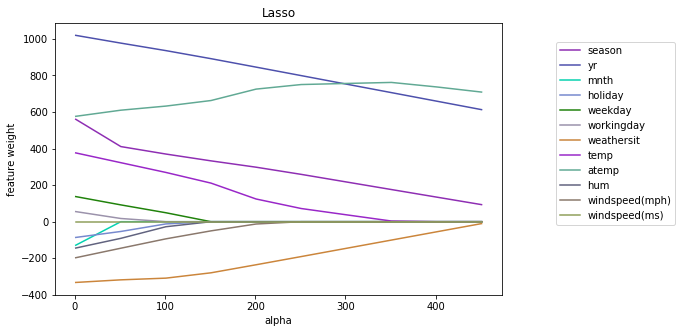

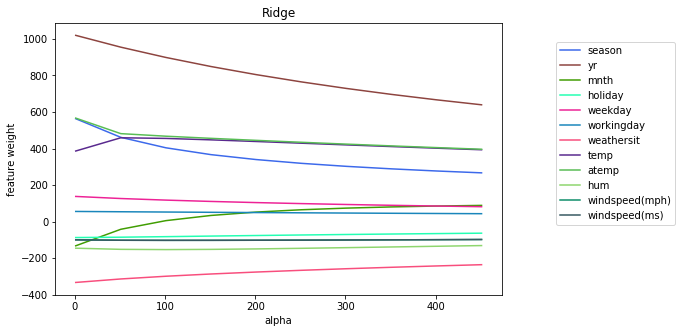

In [19]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

In [20]:
from sklearn.linear_model import LassoCV

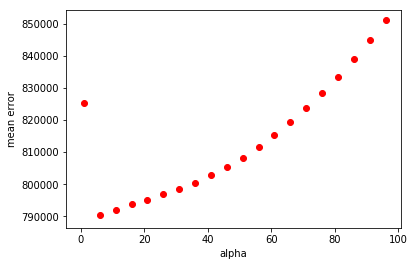

The best alpha is:  6

feature    weight
season:    532.0189828413537
yr:    1015.0602226430597
mnth:    -100.03952614356626
holiday:    -83.29395987529917
weekday:    132.50446549095795
workingday:    51.55708561407389
weathersit:    -330.5598567399813
temp:    370.6798550300351
atemp:    581.3969310654967
hum:    -140.0074055006887
windspeed(mph):    -191.77140847135064
windspeed(ms):    -2.6854518176296607e-08


In [23]:
alphas = np.arange(1, 100, 5)
LassoCV_regressor = LassoCV(alphas=alphas)
LassoCV_regressor.fit(X, y)
for alpha, error in zip(LassoCV_regressor.alphas_, LassoCV_regressor.mse_path_):
    plt.scatter(alpha, np.mean(error), color='red')
plt.xlabel("alpha")
plt.ylabel("mean error")
plt.show()

print("The best alpha is: ", LassoCV_regressor.alpha_)
print()
print('feature    weight')
feature_weight = {}
for f, w in zip(df.columns, LassoCV_regressor.coef_):
    print(f + ":   ", w)
    feature_weight[f] = w

In [26]:
for key, value in sorted(feature_weight.items(), key=lambda kv: kv[1], reverse=True):
    print(key, value)
# Now we can see real correlations of features 
# The best algorithm is LassoCV with alpha = 6

yr 1015.0602226430597
atemp 581.3969310654967
season 532.0189828413537
temp 370.6798550300351
weekday 132.50446549095795
workingday 51.55708561407389
windspeed(ms) -2.6854518176296607e-08
holiday -83.29395987529917
mnth -100.03952614356626
hum -140.0074055006887
windspeed(mph) -191.77140847135064
weathersit -330.5598567399813
